## Maximum wind speed prediction at the Sprogø station

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. First, the statistical steps will be given and then illustrated with functions from the scipy.interpolate module. At the end the interested readers are invited to compute results from raw data and in a slightly different approach.

## Statistical approach

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.
By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability p_i for a given year i is defined as p_i = i/(N+1) with N = 21, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

## Computing the cumulative probabilities

The annual wind speeds maxima have already been computed and saved in the numpy format in the file max-speeds.npy, thus they will be loaded by using numpy:

In [2]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

In [3]:
max_speeds

array([ 28.09000015,  22.45999908,  26.64999962,  26.64999962,
        28.79000092,  30.19000053,  26.19000053,  26.75      ,
        23.34000015,  24.15999985,  29.75      ,  27.93000031,
        26.68000031,  23.85000038,  32.97000122,  25.79000092,
        26.37000084,  25.28000069,  26.72999954,  23.20000076,  26.76000023], dtype=float32)

In [4]:
years_nb

21

Following the cumulative probability definition p_i from the previous section, the corresponding values will be:

In [10]:
cprob = (np.arange(years_nb, dtype=np.float32)+1)/(years_nb+1)
cprob

array([ 0.04545455,  0.09090909,  0.13636364,  0.18181819,  0.22727273,
        0.27272728,  0.31818181,  0.36363637,  0.40909091,  0.45454547,
        0.5       ,  0.54545456,  0.59090906,  0.63636363,  0.68181819,
        0.72727275,  0.77272725,  0.81818181,  0.86363637,  0.90909094,
        0.95454544], dtype=float32)

and they are assumed to fit the given wind speeds:

In [12]:
sorted_max_speeds = np.sort(max_speeds)
sorted_max_speeds

array([ 22.45999908,  23.20000076,  23.34000015,  23.85000038,
        24.15999985,  25.28000069,  25.79000092,  26.19000053,
        26.37000084,  26.64999962,  26.64999962,  26.68000031,
        26.72999954,  26.75      ,  26.76000023,  27.93000031,
        28.09000015,  28.79000092,  29.75      ,  30.19000053,  32.97000122], dtype=float32)

## Prediction with Univariate Spline

In this section the quantile function will be estimated by using the UnivariateSpline class which can represent a spline from points. The default behavior is to build a spline of degree 3 and points can have different weights according to their reliability. Variants are InterpolatedUnivariateSpline and LSQUnivariateSpline on which errors checking is going to change. In case a 2D spline is wanted, the BivariateSpline class family is provided. All those classes for 1D and 2D splines use the FITPACK For- tran subroutines, that’s why a lower library access is available through the splrep and splev functions for respectively representing and evaluating a spline. Moreover interpolation functions without the use of FIT- PACK parameters are also provided for simpler use (see interp1d, interp2d, barycentric_interpolate and so on).
For the Sprogø maxima wind speeds, the UnivariateSpline will be used because a spline of degree 3 seems to correctly fit the data:

In [14]:
from scipy.interpolate import UnivariateSpline
quantile_func = UnivariateSpline(cprob, sorted_max_speeds)
quantile_func

The quantile function is now going to be evaluated from the full range of probabilities:

In [15]:
nprob = np.linspace(0,1,1e2)
print(nprob)
fitted_max_speeds = quantile_func(nprob)
fitted_max_speeds

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404  0.05050505
  0.06060606  0.07070707  0.08080808  0.09090909  0.1010101   0.11111111
  0.12121212  0.13131313  0.14141414  0.15151515  0.16161616  0.17171717
  0.18181818  0.19191919  0.2020202   0.21212121  0.22222222  0.23232323
  0.24242424  0.25252525  0.26262626  0.27272727  0.28282828  0.29292929
  0.3030303   0.31313131  0.32323232  0.33333333  0.34343434  0.35353535
  0.36363636  0.37373737  0.38383838  0.39393939  0.4040404   0.41414141
  0.42424242  0.43434343  0.44444444  0.45454545  0.46464646  0.47474747
  0.48484848  0.49494949  0.50505051  0.51515152  0.52525253  0.53535354
  0.54545455  0.55555556  0.56565657  0.57575758  0.58585859  0.5959596
  0.60606061  0.61616162  0.62626263  0.63636364  0.64646465  0.65656566
  0.66666667  0.67676768  0.68686869  0.6969697   0.70707071  0.71717172
  0.72727273  0.73737374  0.74747475  0.75757576  0.76767677  0.77777778
  0.78787879  0.7979798   0.80808081  0.81818182  0.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


array([ 20.70806946,  20.99752174,  21.27588348,  21.54339766,
        21.80030728,  22.04685531,  22.28328474,  22.50983856,
        22.72675974,  22.93429129,  23.13267617,  23.32215738,
        23.50297791,  23.67538072,  23.83960883,  23.99590519,
        24.14451281,  24.28567467,  24.41963375,  24.54663304,
        24.66691552,  24.78072418,  24.888302  ,  24.98989197,
        25.08573707,  25.17608029,  25.26116462,  25.34123303,
        25.41652852,  25.48729407,  25.55377266,  25.61620729,
        25.67484093,  25.72991656,  25.78167719,  25.83036578,
        25.87622533,  25.91949882,  25.96042923,  25.99925956,
        26.03623278,  26.07159189,  26.10557986,  26.13843968,
        26.17041434,  26.20174682,  26.23268011,  26.26345719,
        26.29432105,  26.32551467,  26.35728104,  26.38986314,
        26.42350396,  26.45844649,  26.4949337 ,  26.53320858,
        26.57351413,  26.61609332,  26.66118914,  26.70904457,
        26.7599026 ,  26.81400622,  26.87159841,  26.93

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

In [16]:
fifty_prob = 1 - 0.02

So the storm wind speed occurring every 50 years can be guessed by:

In [17]:
fifty_wind = quantile_func(fifty_prob)
fifty_wind

array(32.97989825386221)

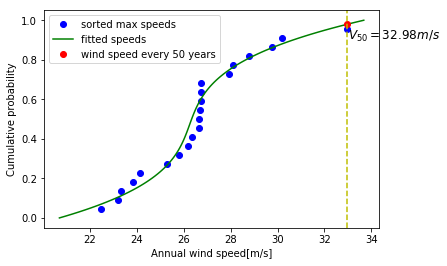

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sorted_max_speeds,cprob, 'bo', label='sorted max speeds')
plt.plot(fitted_max_speeds,nprob, 'g-', label='fitted speeds')
plt.plot(fifty_wind, fifty_prob, 'ro', label='wind speed every 50 years')
plt.axvline(fifty_wind, color='y', linestyle='--')
plt.annotate(r"$V_{50} = 32.98 m/s$", xy=(fifty_wind, fifty_prob), xycoords='data',
            xytext=(33, 0.9), fontsize=12)
plt.ylabel('Cumulative probability')
plt.xlabel('Annual wind speed[m/s]')
plt.legend()

## Unmolten grains in glass

Open the image file MV_HFV_012.jpg and display it. Browse through the keyword arguments in the docstring of imshow to display the image with the “right” orientation (origin in the bottom left corner, and not the upper left corner as for standard arrays)

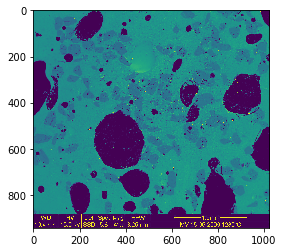

In [43]:

dat = plt.imread('MV_HFV_012.jpg')
plt.imshow(dat)

Crop the image to remove the lower panel with measure information.

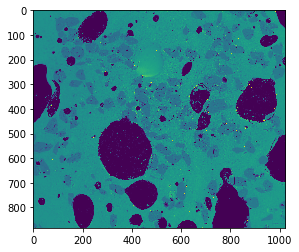

In [44]:
dat = dat[:-60]
plt.imshow(dat)

Slightly filter the image with a median filter in order to refine its histogram. Check how the histogram changes.

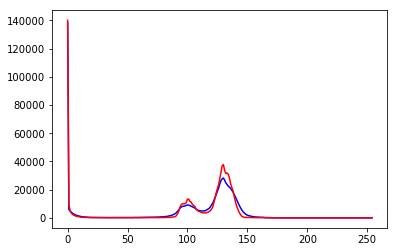

In [54]:
from scipy import ndimage
filtdat = ndimage.median_filter(dat, size=(7,7))
hi_dat = np.histogram(dat, bins = np.arange(256))
hi_filtdat = np.histogram(filtdat, bins=np.arange(256))
hi_dat
x_val = np.arange(255)
plt.plot(x_val, hi_dat[0], 'b')
plt.plot(x_val, hi_filtdat[0], 'r')

Using the histogram of the filtered image, determine thresholds that allow to define masks for sand pixels, glass pixels and bubble pixels. Other option: write a function that determines automatically the thresholds from the minima of the histogram.

In [55]:
void = filtdat <=50
sand = np.logical_and(filtdat>50, filtdat <=114)
glass = filtdat>114

Display an image in which the three phases are colored with three different colors.

In [56]:
phases = void.astype(np.int) + 2 * glass.astype(np.int) + 3 * sand.astype(np.int)

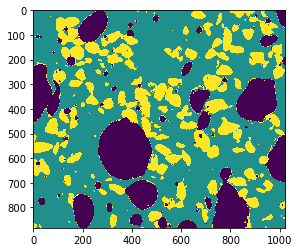

In [57]:
plt.imshow(phases)

Use mathematical morphology to clean the different phases

In [58]:
sand_op = ndimage.binary_opening(sand, iterations=2)

Attribute labels to all bubbles and sand grains, and remove from the sand mask grains that are smaller than 10 pixels. To do so, use ndimage.sum or np.bincount to compute the grain sizes.

In [59]:
sand_labels, sand_nb = ndimage.label(sand_op)
sand_areas = np.array(ndimage.sum(sand_op,sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas>100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)

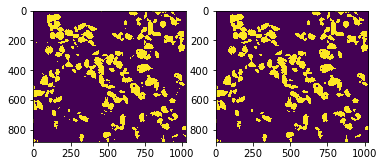

In [63]:
plt.subplot(121)
plt.imshow(sand_op)
plt.subplot(122)
plt.imshow(remove_small_sand)


Compute the mean size of bubbles.

In [64]:
bubbles_labels, bubbles_nb = ndimage.label(void)
bubbles_areas = np.bincount(bubbles_labels.ravel())[1:]
mean_bubble_size = bubbles_areas.mean()
median_bubble_size = np.median(bubbles_areas)
mean_bubble_size, median_bubble_size

(1699.875, 65.0)